# 机器学习工程师纳米学位（试学班）
## 项目 0: 预测你的下一道世界料理


欢迎来到机器学习的预测烹饪菜系项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 下载并导入数据
在这个项目中，你将利用[Yummly](https://www.yummly.com/)所提供的数据集来训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对菜系进行预测。

此项目的数据集来自[Kaggle What's Cooking 竞赛](https://www.kaggle.com/c/whats-cooking/data)。共 39774/9944 个训练和测试数据点，涵盖了中国菜、越南菜、法国菜等的信息。数据集包含以下特征：
- 'id'：24717, 数据编号
- 'cuisine'："indian", 菜名
- 'ingredients'：["tumeric", "vegetable stock", ...] 此菜所包含的原料

首先你需要前往此 [菜系数据集](https://www.kaggle.com/c/whats-cooking/data) 下载(选择 **Download All** )。如果不能正常下载，请参考教室中的下载教程。然后运行下面区域的代码以载入数据集，以及一些此项目所需的 Python 库。如果成功返回数据集的大小，表示数据集已载入成功。

### 1.1 配置环境
首先按快捷键 `ctrl+R` 输入 `cmd` 打开我们的终端，然后输入以下代码，安装本实验所需要的库函数。

```bash
# 安装项目所需要的库
# 注意该代码不能在此直接运行
pip install pandas numpy nltk matplotlib
python -c "import nltk;nltk.download('popular')"
```

### 1.2 加载数据 
其次，在下载完实验数据集后，我们将其解压至当前目录中(即：`MLND-cn-trial\`目录下面)， 然后依次输入以下代码，加载本次实验的训练集和测试集。

In [44]:
# 导入依赖库
import json
import codecs
import pandas as pd
import numpy as np

# 加载数据集
train_filename='train.json'
train_content = pd.read_json(codecs.open(train_filename, mode='r', encoding='utf-8'))

test_filename = 'test.json'
test_content = pd.read_json(codecs.open(test_filename, mode='r', encoding='utf-8'))
    
# 打印加载的数据集数量
print("菜名数据集一共包含 {} 训练数据 和 {} 测试样例。\n".format(len(train_content), len(test_content)))

菜名数据集一共包含 39774 训练数据 和 9944 测试样例。



### 1.3 数据预览
为了查看我们的数据集的分布和菜品总共的种类，我们打印出部分数据样例。运行以下代码：

In [10]:
## 预览该数据集
pd.set_option('display.max_colwidth',120)
print("训练集中前5个数据样例格式为：")
train_content.head(5)

训练集中前5个数据样例格式为：


,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, mil..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, so..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, ch..."


In [16]:
## 查看总共菜品分类
categories=np.unique(train_content['cuisine'])
print("一共包含 {} 种菜品，分别是:\n{}".format(len(categories),categories))

一共包含 20 种菜品，分别是:
[u'brazilian' u'british' u'cajun_creole' u'chinese' u'filipino' u'french'
 u'greek' u'indian' u'irish' u'italian' u'jamaican' u'japanese' u'korean'
 u'mexican' u'moroccan' u'russian' u'southern_us' u'spanish' u'thai'
 u'vietnamese']


---
## 第二步. 分析数据
在项目的第二个部分，你会对菜肴数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测世界菜系的模型，我们需要将数据集分为**特征(Features)**和**目标变量(Target Variables)**。
- **特征**: `'ingredients'`，给我们提供了每个菜品所包含的原料名称。
- **目标变量**：` 'cuisine'`，是我们希望预测的菜系分类。

他们分别被存在 `train_ingredients` 和 `train_targets` 两个变量名中。

In [18]:
train_ingredients = train_content['ingredients']
train_targets = train_content['cuisine']

train_ingredients.head(5)

0    [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese...
1    [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, mil...
2    [eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, so...
3                                                                                        [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, ch...
Name: ingredients, dtype: object

### 编程练习：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了 `numpy`，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 使用最频繁的原料前5分别有哪些？
- 意大利菜中最常见的5个原料有哪些？

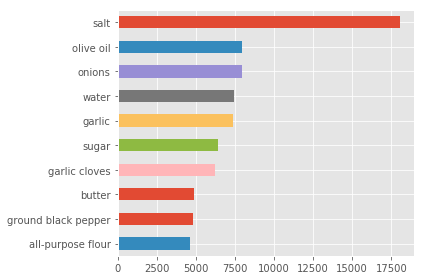

In [29]:
# 用于画图显示
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

bags_of_ingredients = [ Counter(recipe) for recipe in train_ingredients ]
sum_ingredients = sum(bags_of_ingredients, Counter())

# Finally, plot the 10 most used ingredients
plt.style.use(u'ggplot')
fig = pd.DataFrame(sum_ingredients, index=[0]).transpose()[0].sort_values(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
fig.show()

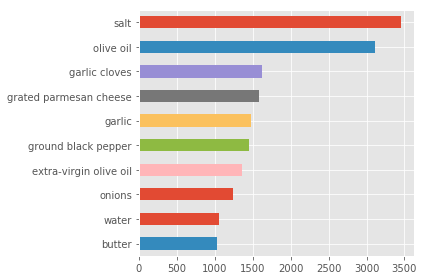

In [49]:
italian_ingredients=train_content[train_content['cuisine']=='italian']['ingredients']
bags_of_ingredients = [ Counter(recipe) for recipe in italian_ingredients ]
sum_ingredients = sum(bags_of_ingredients, Counter())

# Finally, plot the 10 most used ingredients
fig = pd.DataFrame(sum_ingredients, index=[0]).transpose()[0].sort_values(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
fig.show()

---
## 第三步. 建立模型
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 3.1 单词清洗
由于菜品包含的佐料众多，同一种佐料也可能有单复数、时态等变化，为了去除之类差异，我们考虑将**ingredients** 进行过滤

In [15]:
import re
from nltk.stem import WordNetLemmatizer
import numpy as np

def text_clean(ingredients):
    #去除单词的标点符号，只保留 a..z A...Z的单词字符
    ingredients= np.array(ingredients).tolist()
    print("菜品原料：\n{}".format(ingredients[9]))
    ingredients=[[re.sub('[^A-Za-z]', ' ', word) for word in component]for component in ingredients]
    print("去除标点符号之后的结果：\n{}".format(ingredients[9]))

    # 去除单词的单复数，时态，只保留单词的词干
    lemma=WordNetLemmatizer()
    ingredients=[" ".join([ " ".join([lemma.lemmatize(w) for w in words.split(" ")]) for words in component])  for component in ingredients]
    print("去除时态和单复数之后的结果：\n{}".format(ingredients[9]))
    return ingredients

print("\n处理训练集...")
train_ingredients = text_clean(train_content['ingredients'])
print("\n处理测试集...")
test_ingredients = text_clean(test_content['ingredients'])



处理训练集...
菜品原料：
['chopped tomatoes', 'fresh basil', 'garlic', 'extra-virgin olive oil', 'kosher salt', 'flat leaf parsley']
去除标点符号之后的结果：
['chopped tomatoes', 'fresh basil', 'garlic', 'extra virgin olive oil', 'kosher salt', 'flat leaf parsley']
去除时态和单复数之后的结果：
chopped tomato fresh basil garlic extra virgin olive oil kosher salt flat leaf parsley

处理测试集...
菜品原料：
['eggs', 'cherries', 'dates', 'dark muscovado sugar', 'ground cinnamon', 'mixed spice', 'cake', 'vanilla extract', 'self raising flour', 'sultana', 'rum', 'raisins', 'prunes', 'glace cherries', 'butter', 'port']
去除标点符号之后的结果：
['eggs', 'cherries', 'dates', 'dark muscovado sugar', 'ground cinnamon', 'mixed spice', 'cake', 'vanilla extract', 'self raising flour', 'sultana', 'rum', 'raisins', 'prunes', 'glace cherries', 'butter', 'port']
去除时态和单复数之后的结果：
egg cherry date dark muscovado sugar ground cinnamon mixed spice cake vanilla extract self raising flour sultana rum raisin prune glace cherry butter port


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 将单词转换成 0-1 向量

# 处理 训练集
vectorizer=TfidfVectorizer(stop_words='english', ngram_range=(1, 1),
                analyzer='word', max_df=.57, binary=False,
                token_pattern=r"\w+",sublinear_tf=False)
train_tfidf=vectorizer.fit_transform(train_ingredients).todense()

## 处理 测试集
test_tfidf=vectorizer.transform(test_ingredients)

In [17]:
train_targets=np.array(train_content['cuisine']).tolist()
train_targets[:10]

['greek',
 'southern_us',
 'filipino',
 'indian',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'italian']

### 3.2 建立模型 
调用 `sklearn` 中的逻辑回归模型。

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
## 建立逻辑回归模型
parameters = {"C":[1,10]}
classifier = grid_search.GridSearchCV(LogisticRegression(),parameters)
# 训练模型
classifier=classifier.fit(train_tfidf,train_targets)

---
## 第四步. 测试模型

In [20]:
### 预测测试结果
predictions=classifier.predict(test_tfidf)

In [21]:
len(predictions)
test_content['cuisine']=predictions

In [22]:
test_content.head(10)

,id,ingredients,cuisine
0,18009,"[baking powder, eggs, all-purpose flour, raisins, milk, white sugar]",british
1,28583,"[sugar, egg yolks, corn starch, cream of tartar, bananas, vanilla wafers, milk, vanilla extract, toasted pecans, egg...",southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil, cuban peppers, onions]",italian
3,29752,"[meat cuts, file powder, smoked sausage, okra, shrimp, andouille sausage, water, paprika, hot sauce, garlic cloves, ...",cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, leeks, parmigiano reggiano cheese, cornmeal, water, extra-virgin olive ...",italian
5,38527,"[baking powder, all-purpose flour, peach slices, corn starch, heavy cream, lemon juice, unsalted butter, salt, white...",southern_us
6,19666,"[grape juice, orange, white zinfandel]",french
7,41217,"[ground ginger, white pepper, green onions, orange juice, sugar, Sriracha, vegetable oil, orange zest, chicken broth...",chinese
8,28753,"[diced onions, taco seasoning mix, all-purpose flour, chopped cilantro fresh, ground cumin, ground cinnamon, vegetab...",mexican
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ground cinnamon, mixed spice, cake, vanilla extract, self raising flou...",british


---
## 第五步. 提交结果（可选）
为了更好的测试模型的效果，同时比较与其他人的差距，我们将模型的测试集上的结果提交至 [kaggle whats cooking](https://www.kaggle.com/c/whats-cooking/submit) （需要提前注册kaggle账号）。


In [23]:
## 加载结果格式
submit_frame = pd.read_csv("sample_submission.csv")
## 保存结果
result = pd.merge(submit_frame, test_content, on="id", how='left')
result = result.rename(index=str, columns={"cuisine_y": "cuisine"})
test_result_name = "tfidf_cuisine_test.csv"
result[['id','cuisine']].to_csv(test_result_name,index=False)

将生成的 _tfidf_cuisine_test.csv_ 提交至 <https://www.kaggle.com/c/whats-cooking/submit> 然后选择 **Upload Submission File**, 点击 **Make submission**即可。稍作等待，就可以看到右上角的评分结果。